.ipynb_checkpoints
Arms


c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:48: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: divide by zero encountered in log2


ValueError: Minimum image value is not finite

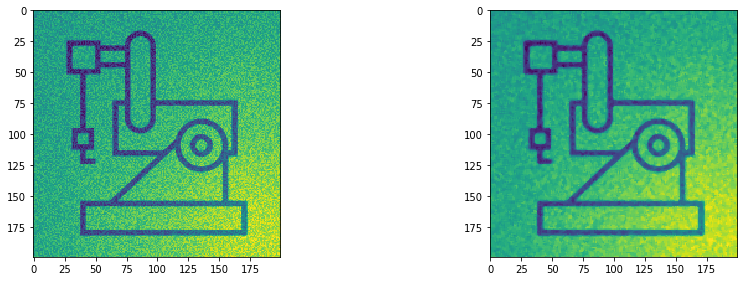

In [40]:
import os
import pathlib

#from mnist import MNIST
from scipy import ndimage
import numpy as np
import scipy.misc as img
import matplotlib.pyplot as plt
import imghdr
import imageio
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import os
import sys

#from skimage import util
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.utils.np_utils import to_categorical
import random

from sklearn.metrics import accuracy_score as score_it

cnt = 0;

for p in pathlib.Path('.').iterdir():
    if p.is_file(): continue
    print(p)
    for t in pathlib.Path(p).iterdir():
        if t.is_file():
            f = ""
            f += str(t)
            ext = os.path.splitext(f)[-1].lower()
            if ext == '.png':
                #print(t)
                image = imageio.imread(str(t))
                res = ndimage.median_filter(image, 3)
                cnt = cnt + 1
                fig = plt.figure(figsize=(15, 10))
                if cnt < 10:
                    plt.subplot(221);
                    plt.imshow(image);
                    plt.subplot(222);
                    plt.imshow(res);
                imageio.imwrite(str(t) + 'filtered' + '.jpg',res)
                #plt.imshow(res)
                arms = img.imread(str(t))
                gflt = ndimage.gaussian_filter(arms, sigma = 4)
                maxValue = (arms - gflt).max()
                minValue = (arms - gflt).min()
                diff = np.log2(arms) - np.log2(gflt)
                newImage = (diff-minValue)/(maxValue-minValue)
                newImage += arms;
                imageio.imwrite(str(t) + 'intencity_filtered' + '.jpg',newImage)
                break
                           
    


In [36]:
#!/usr/bin/python
from PIL import Image
import os, sys

import os
import pathlib

#from mnist import MNIST
from scipy import ndimage
import numpy as np
import scipy.misc as img
import matplotlib.pyplot as plt
import imghdr
import imageio
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import os
import sys

#from skimage import util
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.utils.np_utils import to_categorical
import random

from sklearn.metrics import accuracy_score as score_it

cnt = 0;

for p in pathlib.Path('.').iterdir():
    if p.is_file(): continue
    print(p)
    for t in pathlib.Path(p).iterdir():
        if t.is_file():
            f = ""
            f += str(t)
            ext = os.path.splitext(f)[-1].lower()
            if ext == '.png':
                im = Image.open(f)
                imResize = im.resize((28,28), Image.ANTIALIAS)
                imResize.save(f + ' resized.png', 'PNG', quality=90)
                
                           
    

.ipynb_checkpoints
Arms
FigureWheels
Figure_normal_legs
Head


In [19]:
## Required Modules
from PIL import Image
import glob
import os
import sys

## Global Variables
FILETYPES = ['*.png']
NEWIMAGESIZE = 28

## Functions
def convert2jpg():
    for types in FILETYPES:
        openFiles = glob.glob(types)
        
        for files in openFiles:
            inFile = Image.open(files) 
            fileName = os.path.splitext(files)[0] # gets filename
            outFile = fileName + ".jpg" 
            inFile.save(outFile)
            print (fileName + " ... converted")
            
    print ("\n")
    return None

def delOldFileTypes():
    for types in FILETYPES:
        openFiles = glob.glob(types)
        
        for files in openFiles:
            os.remove(files)
            print (files + " ... deleted")
            
    print ("\n")
    return None
    

def resize(): 
    openFiles = glob.glob('*.jpg')
    
    for files in openFiles:
        inFile = Image.open(files)
        fileName = os.path.splitext(files)[0] # gets filename
        outFile = fileName + "new.jpg"
        print (fileName)
        print ("Original size ",inFile.size)
        xDim = inFile.size[0]
        yDim = inFile.size[1]        
        newSize = aspectRatio(xDim, yDim)       
        inFile = inFile.resize((int(newSize[0]),int(newSize[1])),Image.ANTIALIAS)
        inFile.save(outFile)
        print ("New Size ",inFile.size, "\n")
        
    return None

def aspectRatio(xDim, yDim):
    
    if xDim <= NEWIMAGESIZE and yDim <= NEWIMAGESIZE: #ensures images already correct size are not enlarged.
        return(xDim, yDim)
    
    elif xDim > yDim:
        divider = xDim/float(NEWIMAGESIZE)
        xDim = float(xDim/divider)
        yDim = float(yDim/divider)
        return(xDim, yDim)
        
    elif yDim > xDim:
        divider = yDim/float(NEWIMAGESIZE)
        xDim = float(xDim/divider)
        yDim = float(yDim/divider)
        return(xDim, yDim)
       
    elif xDim == yDim:
        xDim = NEWIMAGESIZE
        yDim = NEWIMAGESIZE
        return(xDim, yDim)

convert2jpg()
delOldFileTypes()
resize()


print ('All Done!!!')
#raw_input('Images Resized... Press any key to continue')





All Done!!!


In [23]:
image_size = 28  # Pixel width and height.
pixel_depth = 255.0  # Number of levels per pixel.
folders = [
    'Arms/',
    'Figure_normal_legs/',
    'FigureWheels/',
    'Head/',

]

def load_letter(folder, min_num_images):
  """Load the data for a single letter label."""
  image_files = os.listdir(folder)
  dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
  print(folder)
  num_images = 0
  for image in image_files:
    image_file = os.path.join(folder, image)
    try:
      image_data = (ndimage.imread(image_file).astype(float) - 
                    pixel_depth / 2) / pixel_depth
      if image_data.shape != (image_size, image_size):
        raise Exception('Unexpected image shape: %s' % str(image_data.shape))
      dataset[num_images, :, :] = image_data
      num_images = num_images + 1
    except IOError as e:
      print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
    
  dataset = dataset[0:num_images, :, :]
  if num_images < min_num_images:
    raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
    
  print('Full dataset tensor:', dataset.shape)
  print('Mean:', np.mean(dataset))
  print('Standard deviation:', np.std(dataset))
  return dataset

X_datasets = list()
Y_datasets = list()
for idx in range(len(folders)):
    folder = folders[idx] 
    X_datasets.append(load_letter(folder, 222))
    labels = np.zeros((X_datasets[-1].shape[0],len(folders)))
    labels[:,idx] = 1
    Y_datasets.append(labels)

Arms/


c:\users\alan\anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.


Exception: Unexpected image shape: (200, 200)

In [ ]:
import os
import pathlib

#from mnist import MNIST
from scipy import ndimage
import numpy as np
import scipy.misc as img
import matplotlib.pyplot as plt
import imghdr
import imageio
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
from __future__ import print_function
import os
import sys

#from skimage import util
from keras.models import Sequential
from keras.layers import Dense,Activation,Reshape
from keras.utils.np_utils import to_categorical
import random

from sklearn.metrics import accuracy_score as score_it

cnt = 0;

for p in pathlib.Path('.').iterdir():
    if p.is_file(): continue
    print(p)
    for t in pathlib.Path(p).iterdir():
        if t.is_file():
            f = ""
            f += str(t)
            ext = os.path.splitext(f)[-1].lower()
            if ext == '.png':
                #print(t)
                image = imageio.imread(str(t))
                res = ndimage.median_filter(image, 3)
                cnt = cnt + 1
                fig = plt.figure(figsize=(15, 10))
                if cnt < 10:
                    plt.subplot(221);
                    plt.imshow(image);
                    plt.subplot(222);
                    plt.imshow(res);
                imageio.imwrite(str(t) + 'filtered' + '.jpg',res)
                #plt.imshow(res)
                arms = imageio.imread(str(t) + 'filtered' + '.jpg')
                gflt = ndimage.gaussian_filter(arms, sigma = 4)
                maxValue = (arms - gflt).max()
                minValue = (arms - gflt).min()
                diff = np.log2(arms) - np.log2(gflt)
                newImage = (diff-minValue)/(maxValue-minValue)
                newImage += arms;
                imageio.imwrite(str(t) + 'intencity_filtered' + '.jpg',res)
                break
                           
    
